# Prepare JSONL file with geo info 

- Convert to WGS84 coordinate system 

- Clean columns 

- Dissolve polygons

- Simplify to reduce size

- Export to Shapefile or Newline Delimited JSON file

- Save to WKT format text for BQ

In [14]:
import geopandas as gpd
import json
from typing import Optional


In [34]:
def convert_shapefile(input_shapefile: str,
                      output_ndjson: str,
                      dissolve_field: Optional[str] = None,
                      simplify: Optional[float] = None,
                      output_shapefile: Optional[str] = None,
                      target_crs: str = "EPSG:4326"):
    # Read the shapefile
    gdf = gpd.read_file(input_shapefile)

    # Check if conversion is necessary
    if gdf.crs != target_crs:
        # Convert the coordinate system to WGS84 (EPSG:4326)
        gdf = gdf.to_crs(target_crs)

    if dissolve_field:
        # Dissolve polygons based on the specified field
        gdf = gdf.dissolve(by=dissolve_field)
            # note: null is not included

        # Keep only the specified columns
        gdf = gdf.reset_index()
        gdf = gdf[[dissolve_field,'geometry']]
    else:
        gdf = gdf['geometry']

    if simplify:
        # Simplify geometries to reduce complexity
        gdf['geometry'] = gdf['geometry'].simplify(simplify).buffer(0)

    if output_shapefile:
        # Write the filtered and possibly dissolved GeoDataFrame to a new shapefile
        gdf.to_file(output_shapefile)

    # Open the NDJSON file for writing
    with open(output_ndjson, 'w') as ndjson_file:
        # Iterate over each record in the GeoDataFrame
        for _, row in gdf.iterrows():
            # Convert each row to a dictionary, here 'geometry' is directly in GeoJSON format
            if dissolve_field:
                row_dict = {dissolve_field: row[dissolve_field], 'geometry': row['geometry'].to_wkt()}
            else:
                row_dict = {'geometry': row['geometry'].to_wkt()}

            # Write the dictionary as a JSON object followed by a newline
            ndjson_file.write(json.dumps(row_dict) + '\n')

    return gdf


In [33]:
gdf

inputs

In [31]:
input_shapefile = r'C:/Users/dhan.AD/Documents/Work/projects/replica_transit/maps/shp/CTPS_TDM23_TAZ_2017g_v202405.shp'
output_ndjson = r'./data/mpos_tazv202405_v20240813.ndjson'
level = 'mpo'
simplify = None
# simplify = 0.05
# output_shapefile

run

In [ ]:
gdf = convert_shapefile(input_shapefile,output_ndjson,level) #,simplify)

In [25]:
import os
print(os.getcwd())


c:\Users\dhan.AD\Documents\GitHub\bigq\0_prepare


## optional: preview

In [ ]:
import matplotlib.pyplot as plt

In [23]:
gdf

,mpo,geometry
0,BRMPO,"MULTIPOLYGON (((-70.56812 42.67238, -70.56773 ..."
1,BRPC,"POLYGON ((-73.23333 42.04508, -73.50814 42.086..."
2,CCC,"MULTIPOLYGON (((-70.58426 41.56360, -70.68695 ..."
3,CMRPC,"POLYGON ((-71.57737 42.01396, -72.13571 42.030..."
4,FRCOG,"POLYGON ((-72.31460 42.34353, -72.32813 42.318..."
5,MRPC,"POLYGON ((-71.65674 42.43096, -71.81778 42.403..."
6,MVC,"MULTIPOLYGON (((-70.79991 41.31286, -70.83489 ..."
7,MVPC,"MULTIPOLYGON (((-70.80928 42.75002, -70.80707 ..."
8,NMCOG,"POLYGON ((-71.22456 42.52017, -71.42379 42.526..."
9,NPEDC,"MULTIPOLYGON (((-69.97463 41.30137, -70.01210 ..."


<AxesSubplot:>

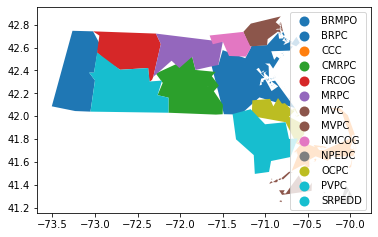

In [24]:
gdf.plot(column='mpo', legend=True) # simplify = 0.05

<AxesSubplot:>

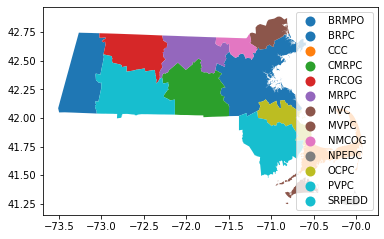

In [37]:
gdf.plot(column='mpo', legend=True) # simplify = None

# End